In [31]:
import pandas as pd
import numpy as np

show = pd.read_csv('No show data.csv')
show.head(5)

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [11]:
show.isnull().sum()

Age                        0
Gender                     0
AppointmentRegistration    0
ApointmentData             0
DayOfTheWeek               0
Status                     0
Diabetes                   0
Alcoolism                  0
HiperTension               0
Handcap                    0
Smokes                     0
Scholarship                0
Tuberculosis               0
Sms_Reminder               0
AwaitingTime               0
dtype: int64

In [12]:
show['Age'].mean()

37.80801666666667

In [13]:
show['Gender'].value_counts()

F    200505
M     99495
Name: Gender, dtype: int64

In [14]:
show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Age                      300000 non-null  int64 
 1   Gender                   300000 non-null  object
 2   AppointmentRegistration  300000 non-null  object
 3   ApointmentData           300000 non-null  object
 4   DayOfTheWeek             300000 non-null  object
 5   Status                   300000 non-null  object
 6   Diabetes                 300000 non-null  int64 
 7   Alcoolism                300000 non-null  int64 
 8   HiperTension             300000 non-null  int64 
 9   Handcap                  300000 non-null  int64 
 10  Smokes                   300000 non-null  int64 
 11  Scholarship              300000 non-null  int64 
 12  Tuberculosis             300000 non-null  int64 
 13  Sms_Reminder             300000 non-null  int64 
 14  AwaitingTime        

In [13]:
# Appointment no-show rates
no_show_rates = show.groupby('Status')['Status'].count() / len(show)
print('Appointment no-show rates:')
print(no_show_rates)

Appointment no-show rates:
Status
No-Show    0.302437
Show-Up    0.697563
Name: Status, dtype: float64


In [14]:
# Each day trend
days_counts = show['DayOfTheWeek'].value_counts().sort_index()
print('Days trends:')
print(days_counts)

Days trends:
Friday       52771
Monday       59298
Saturday      1393
Sunday           6
Thursday     60262
Tuesday      62775
Wednesday    63495
Name: DayOfTheWeek, dtype: int64


In [15]:
# Converting appointment registration to datetime format
show['AppointmentRegistration'] = pd.to_datetime(show['AppointmentRegistration'])

# Grouping appointment trends by month
show['appointment_month'] = show['AppointmentRegistration'].dt.to_period('M')
appointment_counts = show.groupby('appointment_month')['appointment_month'].count()
print('Appointment trends by month:')
print(appointment_counts)

Appointment trends by month:
appointment_month
2013-05        1
2013-08        1
2013-09        4
2013-10       20
2013-11      252
2013-12     3457
2014-01    13266
2014-02    12292
2014-03    11502
2014-04    11942
2014-05    13438
2014-06    12428
2014-07    14131
2014-08    13812
2014-09    14333
2014-10    14859
2014-11    12506
2014-12     9910
2015-01    12334
2015-02    10686
2015-03    13835
2015-04    11798
2015-05    13683
2015-06    12327
2015-07    13155
2015-08    12704
2015-09    11943
2015-10    12032
2015-11    11393
2015-12     5956
Freq: M, Name: appointment_month, dtype: int64


<ipython-input-15-6519da3ea8e2>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  show['appointment_month'] = show['AppointmentRegistration'].dt.to_period('M')


In [16]:
# Grouping appointment trends by year
show['appointment_year'] = show['AppointmentRegistration'].dt.to_period('Y')
appointment_countsye = show.groupby('appointment_year')['appointment_year'].count()
print('Appointment trends by year:')
print(appointment_countsye)

Appointment trends by year:
appointment_year
2013      3735
2014    154419
2015    141846
Freq: A-DEC, Name: appointment_year, dtype: int64


<ipython-input-16-feba04b6c36b>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  show['appointment_year'] = show['AppointmentRegistration'].dt.to_period('Y')


In [17]:
# Count per status #
show['Status'].value_counts()

Show-Up    209269
No-Show     90731
Name: Status, dtype: int64

In [18]:
# Count category per variable #
variables = show.iloc[:, 6:14]
value_counts = variables.apply(pd.Series.value_counts)
print(value_counts)

   Diabetes  Alcoolism  HiperTension  Handcap    Smokes  Scholarship  \
0  276610.0   292497.0      235233.0   294403  284289.0     270931.0   
1   23390.0     7503.0       64767.0     5098   15711.0      29069.0   
2       NaN        NaN           NaN      449       NaN          NaN   
3       NaN        NaN           NaN       39       NaN          NaN   
4       NaN        NaN           NaN       11       NaN          NaN   

   Tuberculosis  Sms_Reminder  
0      299865.0      128547.0  
1         135.0      170654.0  
2           NaN         799.0  
3           NaN           NaN  
4           NaN           NaN  


In [19]:
# Average waiting time #
show['AwaitingTime'].mean()

-13.841813333333333

In [20]:
# Average waiting time per status #
average_awaiting_time = show.groupby('Status')['AwaitingTime'].mean()
print(average_awaiting_time)

Status
No-Show   -15.433093
Show-Up   -13.151895
Name: AwaitingTime, dtype: float64


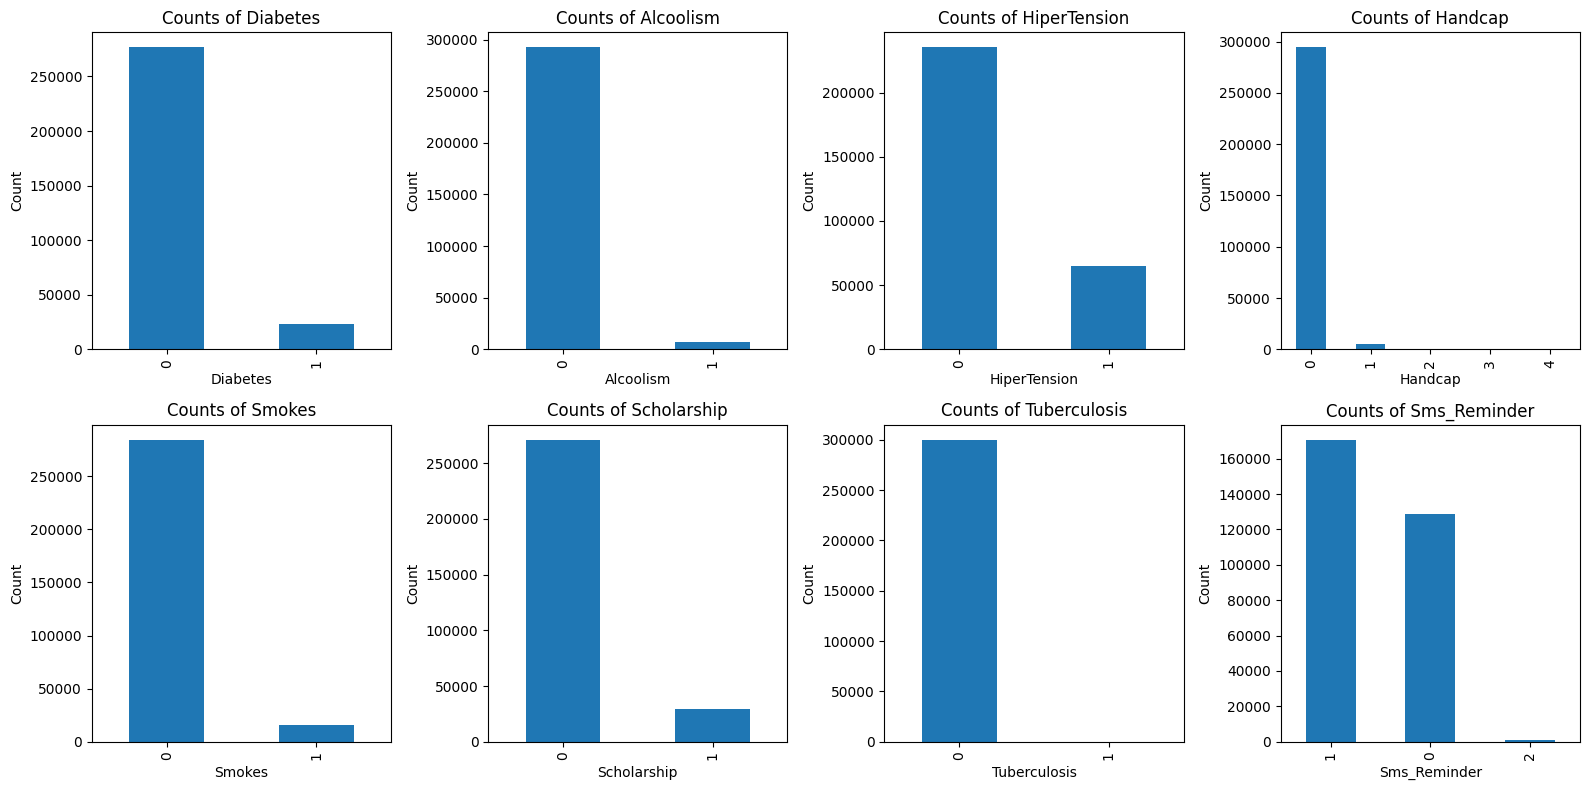

In [44]:
import matplotlib.pyplot as plt

# Subset of variables
variables = show.iloc[:, 6:14]

# Initialize subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through each variable and plot its value counts
for i, col in enumerate(variables.columns):
    ax = axes[i]
    value_counts = variables[col].value_counts()
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title(f'Counts of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


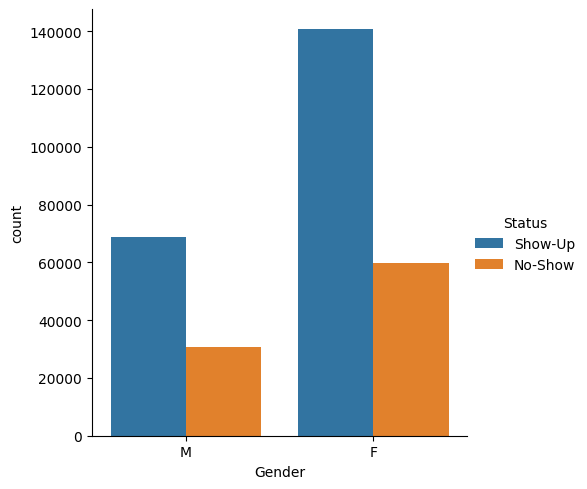

In [15]:
import seaborn as sns
# Count of sex per status #

sns.catplot(data=show, x="Gender", hue="Status", kind="count")

<Axes: xlabel='Age', ylabel='Count'>

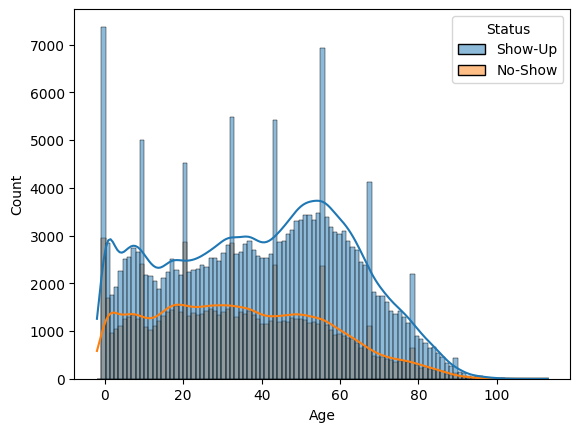

In [19]:
# Plot a histogram of Age
sns.histplot(data=show, x='Age', hue='Status', kde=True)

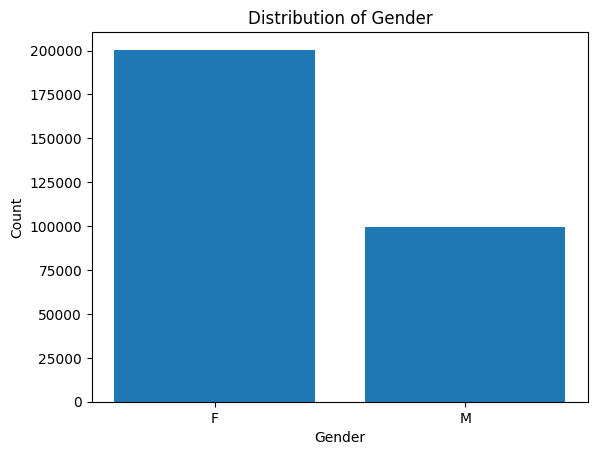

In [21]:
# Create a bar chart for Gender
import matplotlib.pyplot as plt

gender_counts = show['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

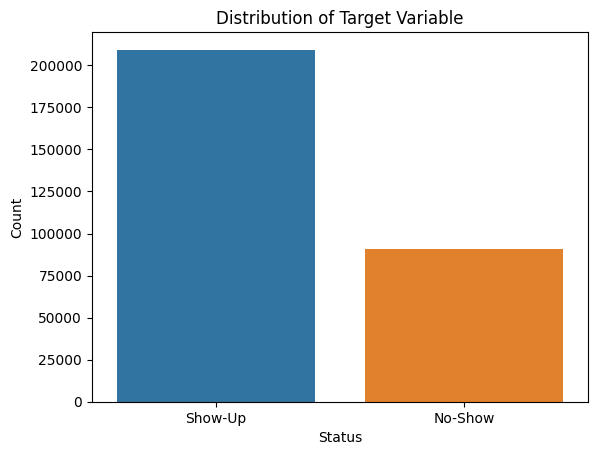

In [26]:
# Distribution of the target variable (binary classification)
sns.countplot(data=show, x='Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

In [28]:
# Calculate class distribution percentages
class_distribution = show['Status'].value_counts(normalize=True)
print(class_distribution)


Show-Up    0.697563
No-Show    0.302437
Name: Status, dtype: float64


In [ ]:
#############################################################

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Data cleaning
show['gender'] = show['Gender'].map({'M': 0, 'F': 1})
show['day_of_week'] = show['DayOfTheWeek'].map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6})
show['status'] = np.where(show['Status'] == 'Show-Up', 1, 0)
show

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime,appointment_month,appointment_year,gender,day_of_week,status
0,19,M,2014-12-16 14:46:25+00:00,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29,2014-12,2014,0,2,1
1,24,F,2015-08-18 07:01:26+00:00,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1,2015-08,2015,1,2,1
2,4,F,2014-02-17 12:53:46+00:00,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1,2014-02,2014,1,1,1
3,5,M,2014-07-23 17:02:11+00:00,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15,2014-07,2014,0,3,1
4,38,M,2015-10-21 15:20:09+00:00,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6,2015-10,2015,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,41,M,2014-03-24 09:28:22+00:00,2014-04-16T00:00:00Z,Wednesday,Show-Up,0,0,1,0,0,0,0,1,-23,2014-03,2014,0,2,1
299996,67,F,2014-11-21 12:00:36+00:00,2014-11-25T00:00:00Z,Tuesday,Show-Up,1,0,1,0,0,0,0,1,-4,2014-11,2014,1,1,1
299997,48,F,2014-07-24 15:46:38+00:00,2014-07-25T00:00:00Z,Friday,No-Show,0,0,0,0,0,1,0,0,-1,2014-07,2014,1,4,0
299998,5,M,2015-05-15 09:58:50+00:00,2015-05-21T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,0,-6,2015-05,2015,0,3,1


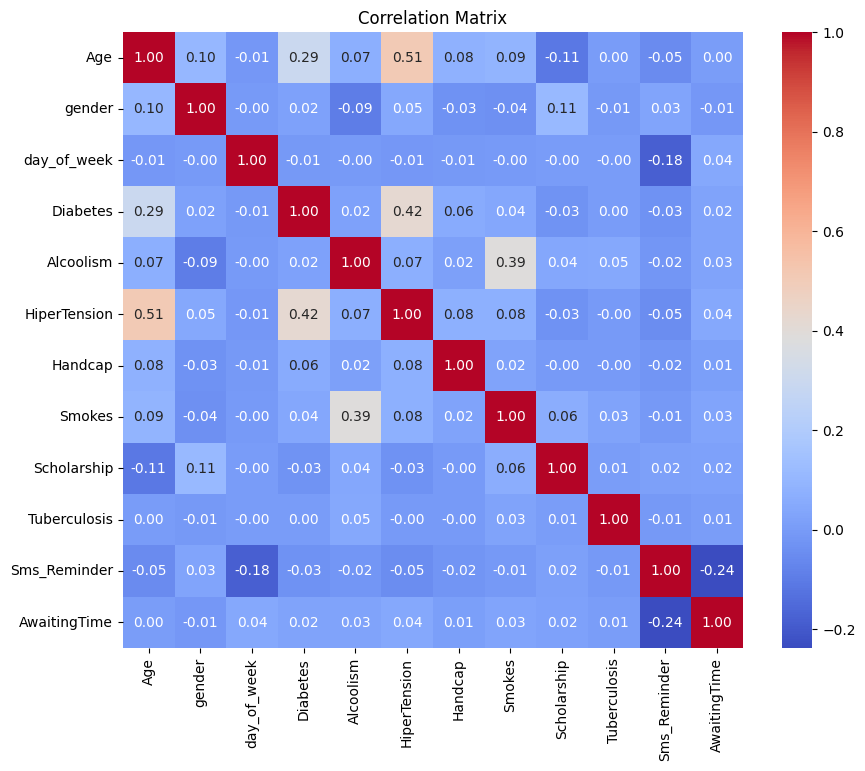

In [101]:
# Feature selection
X = show[['Age', 'gender', 'day_of_week', 'Diabetes', 'Alcoolism', 'HiperTension', 'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis',
          'Sms_Reminder', 'AwaitingTime']]
y = show['status']

# Correlation
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [144]:
# Model 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
Mod_1 = logreg.fit(X_train, y_train)

# Model 1 accuracy score
y_pred = Mod_1.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(Mod_1.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Defining function to plot ROC #

def plot_roc_curve(fpr, tpr, roc_auc):
  plt.figure()
  lw = 2
  plt.figure(figsize=(6,6))
  plt.plot(fpr, tpr, color='darkorange',
  lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.show()

In [104]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

mod1_prob = Mod_1.predict_proba(X_test)
mod1_prob1 = mod1_prob[:,1]

np.max(mod1_prob1)

0.8410403584551345

In [105]:
fpr,tpr,threshold = roc_curve(y_test, mod1_prob1)

roc_auc = auc(fpr,tpr)
roc_auc

0.5884955462662068

<Figure size 640x480 with 0 Axes>

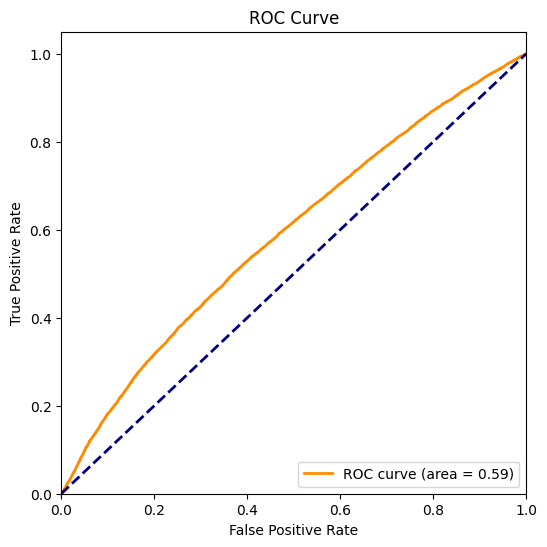

In [106]:
plot_roc_curve(fpr, tpr, roc_auc)

[0.69766667 0.69767829 0.69768992 ... 1.         1.         1.        ] [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 4.77783086e-05
 2.38891543e-05 0.00000000e+00] [0.05835171 0.06048544 0.08940355 ... 0.83314853 0.83536317 0.84104036]


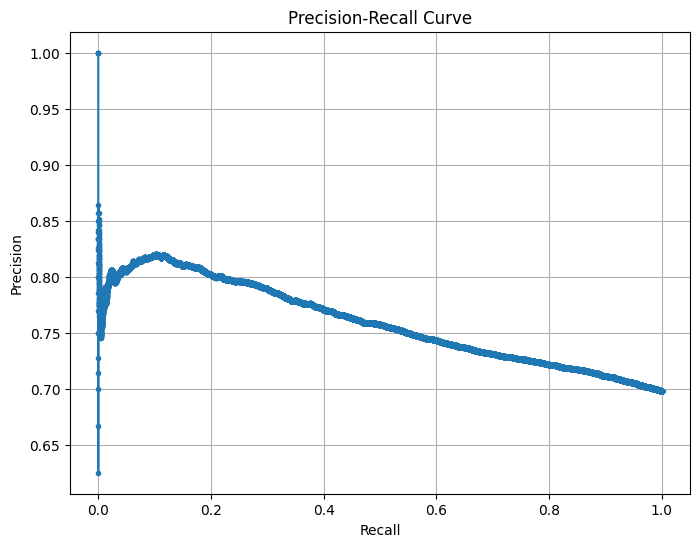

In [81]:
precision, recall, thresholds = precision_recall_curve(y_test, mod1_prob1)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [107]:
from sklearn.metrics import confusion_matrix
model1_pred = (y_pred > 0.5)
confusion_matrix(y_test, model1_pred)

array([[   66, 18074],
       [   98, 41762]])

In [108]:
print('Correct predicted:',np.mean(model1_pred == y_test))
print('Test Error Rate:', np.mean(model1_pred != y_test))

Correct predicted: 0.6971333333333334
Test Error Rate: 0.3028666666666667


In [109]:
## LDA with all variables splitted randomly
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [110]:
lda.score(X_test, y_test)

0.69705

In [111]:
import statsmodels.formula.api as smf

# Model 1.2 (same data, different package)
Mod_2 = smf.logit('status ~ Age + gender + day_of_week + Diabetes + Alcoolism + HiperTension + Handcap + Smokes + Scholarship + Tuberculosis + Sms_Reminder + AwaitingTime',data=show).fit()
Mod_2.summary()

Optimization terminated successfully.
         Current function value: 0.604125
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:               300000
Model:                          Logit   Df Residuals:                   299987
Method:                           MLE   Df Model:                           12
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:                 0.01434
Time:                        03:15:19   Log-Likelihood:            -1.8124e+05
converged:                       True   LL-Null:                   -1.8387e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5772      0.013     45.917      0.000       0.553       0.602
Age              0.0094      0.000     44.427      0.000       0.009       0.010
gender           0.0044      0.009      0.502      0.616      -0.013       0.021
day_of_week      0.0114      0.003      3.898      0.000       0.006       0.017
Diabetes        -0.0194      0.017     -1.109      0.267      -0.054       0.015
Alcoolism       -0.3226      0.027    -12.017      0.000      -0.375      -0.270
HiperTension     0.0714      0.013      5.708      0.000       0.047       0.096
Handcap         -0.0115      0.026     -0.435      0.663      -0.063       0.040
Smokes          -0.2385      0.019    -12.484      0.000      -0.276      -0.201
Scholarship     -0.2113      0.013    -15.952      0.000      -0.237      -0.185
Tuberculosis    -0.2048      0.179     -1.141      0.254      -0.556       0.147
Sms_Reminder     0.1038      0.008     12.337      0.000       0.087       0.120
AwaitingTime     0.0100      0.000     38.314      0.000       0.009       0.010
================================================================================
"""

In [114]:
#Model 2
#Splitting test after 2015-04 and training before 2015-04
X1 = show[['Age', 'gender', 'day_of_week', 'Diabetes', 'Alcoolism', 'HiperTension', 'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis',
          'Sms_Reminder', 'AwaitingTime']]
y1 = show['status']
train_bool = show['appointment_month'] < '2015-04'
X1_test = X1[~train_bool]
y1_test = y1[~train_bool]
X1_train = X1[train_bool]
y1_train = y1[train_bool]

In [117]:
# Model 2 evaluation
Mod2 = smf.logit('status ~ Age + gender + day_of_week + Diabetes + Alcoolism + HiperTension + Handcap + Smokes + Scholarship + Tuberculosis + Sms_Reminder + AwaitingTime',
                    data=show, subset = train_bool).fit()
Mod2.summary()

Optimization terminated successfully.
         Current function value: 0.602902
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:               195009
Model:                          Logit   Df Residuals:                   194996
Method:                           MLE   Df Model:                           12
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:                 0.01435
Time:                        03:20:11   Log-Likelihood:            -1.1757e+05
converged:                       True   LL-Null:                   -1.1928e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5871      0.015     38.206      0.000       0.557       0.617
Age              0.0095      0.000     35.938      0.000       0.009       0.010
gender           0.0056      0.011      0.519      0.604      -0.016       0.027
day_of_week      0.0098      0.004      2.739      0.006       0.003       0.017
Diabetes        -0.0203      0.021     -0.948      0.343      -0.062       0.022
Alcoolism       -0.3379      0.033    -10.162      0.000      -0.403      -0.273
HiperTension     0.0627      0.015      4.061      0.000       0.032       0.093
Handcap          0.0012      0.032      0.038      0.970      -0.062       0.065
Smokes          -0.2413      0.024    -10.212      0.000      -0.288      -0.195
Scholarship     -0.2249      0.016    -13.754      0.000      -0.257      -0.193
Tuberculosis    -0.3329      0.218     -1.525      0.127      -0.761       0.095
Sms_Reminder     0.0983      0.010      9.552      0.000       0.078       0.118
AwaitingTime     0.0094      0.000     29.932      0.000       0.009       0.010
================================================================================
"""

In [125]:
# Model in sklearn

Mod22 = logreg.fit(X1_train, y1_train)
y_pred22 = Mod22.predict(X1_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(Mod_1.score(X1_test, y1_test)))

Accuracy of logistic regression classifier on test set: 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
result2_prob = Mod2.predict(X1_test)
result2_prob

1         0.696312
4         0.730617
6         0.724263
7         0.601357
10        0.629690
            ...   
299987    0.727396
299990    0.655128
299991    0.689579
299998    0.647317
299999    0.597149
Length: 104991, dtype: float64

In [120]:
result2_pred = (result2_prob > 0.5)
result2_pred

1         True
4         True
6         True
7         True
10        True
          ... 
299987    True
299990    True
299991    True
299998    True
299999    True
Length: 104991, dtype: bool

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test, result2_pred)

array([[  105, 31935],
       [  108, 72843]])

In [123]:
print('Correct predicted:',np.mean(result2_pred == y1_test))
print('Test Error Rate:', np.mean(result2_pred != y1_test))

Correct predicted: 0.694802411635283
Test Error Rate: 0.305197588364717


In [126]:
mod2_prob = Mod22.predict_proba(X1_test)
mod2_prob2 = mod2_prob[:, 1]

np.max(mod2_prob2)

0.8371296057316915

In [128]:
fpr2,tpr2,threshold2 = roc_curve(y1_test, mod2_prob2)

roc_auc2 = auc(fpr2,tpr2)
roc_auc2

0.5828969128218382

<Figure size 640x480 with 0 Axes>

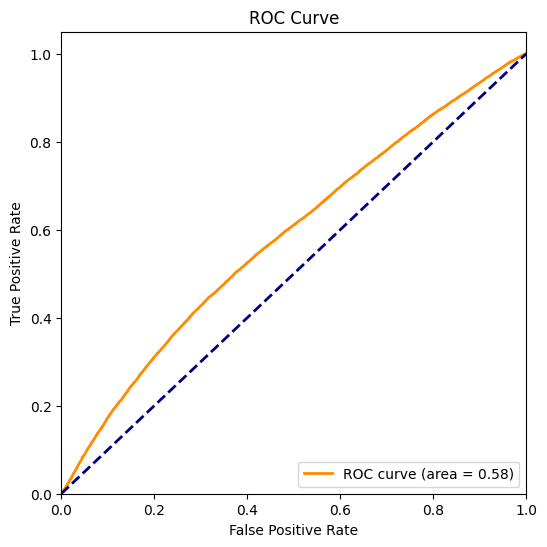

In [129]:
plot_roc_curve(fpr2, tpr2, roc_auc2)

In [130]:
# Model 3 (This one with only significant variables and splitting on 2015)
Mod_3 = smf.logit('status ~ Age + day_of_week + Alcoolism + HiperTension + Smokes + Scholarship + Sms_Reminder + AwaitingTime',
                    data=show, subset = train_bool).fit()
Mod_3.summary()

Optimization terminated successfully.
         Current function value: 0.602910
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:               195009
Model:                          Logit   Df Residuals:                   195000
Method:                           MLE   Df Model:                            8
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:                 0.01434
Time:                        03:31:42   Log-Likelihood:            -1.1757e+05
converged:                       True   LL-Null:                   -1.1928e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5902      0.014     41.343      0.000       0.562       0.618
Age              0.0094      0.000     36.425      0.000       0.009       0.010
day_of_week      0.0099      0.004      2.751      0.006       0.003       0.017
Alcoolism       -0.3409      0.033    -10.309      0.000      -0.406      -0.276
HiperTension     0.0580      0.015      3.988      0.000       0.029       0.086
Smokes          -0.2421      0.024    -10.247      0.000      -0.288      -0.196
Scholarship     -0.2238      0.016    -13.818      0.000      -0.256      -0.192
Sms_Reminder     0.0986      0.010      9.592      0.000       0.078       0.119
AwaitingTime     0.0094      0.000     29.925      0.000       0.009       0.010
================================================================================
"""

In [131]:
X3 = show[['Age', 'day_of_week', 'Alcoolism', 'HiperTension', 'Smokes', 'Scholarship', 'Sms_Reminder', 'AwaitingTime']]
y3 = show['status']
X3_test = X3[~train_bool]
y3_test = y3[~train_bool]
X3_train = X3[train_bool]
y3_train = y3[train_bool]

In [132]:
Mod33 = logreg.fit(X3_train, y3_train)

# Model 3 evaluation
y_pred33 = Mod33.predict(X3_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(Mod33.score(X3_test, y3_test)))

Accuracy of logistic regression classifier on test set: 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
mod3_prob = Mod33.predict_proba(X3_test)
mod3_prob3 = mod3_prob[:, 1]

np.max(mod3_prob3)

0.8355832946976424

In [134]:
fpr3,tpr3,threshold3 = roc_curve(y3_test, mod3_prob3)

roc_auc3 = auc(fpr3,tpr3)
roc_auc3

0.5831305699509176

<Figure size 640x480 with 0 Axes>

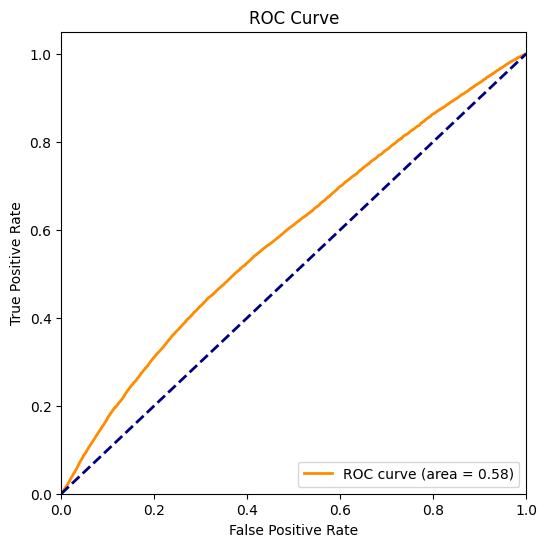

In [135]:
plot_roc_curve(fpr3, tpr3, roc_auc3)

In [140]:
result3_prob = Mod_3.predict(X3_test)
result3_pred = (result3_prob > 0.5)
confusion_matrix(y3_test, result3_pred)

array([[  101, 31939],
       [  102, 72849]])

In [141]:
print('Correct predicted:',np.mean(result3_pred == y3_test))
print('Test Error Rate:', np.mean(result3_pred != y3_test))

Correct predicted: 0.6948214608871237
Test Error Rate: 0.30517853911287635


In [97]:
(101+72849) / 104991

0.6948214608871237

In [142]:
## Model 4 (randomly splitted with significant variables)

Mod4 = smf.logit('status ~ Age + day_of_week + Alcoolism + HiperTension + Smokes + Scholarship + Sms_Reminder + AwaitingTime',
                    data=show).fit()
Mod4.summary()

Optimization terminated successfully.
         Current function value: 0.604130
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 status   No. Observations:               300000
Model:                          Logit   Df Residuals:                   299991
Method:                           MLE   Df Model:                            8
Date:                Sun, 08 Oct 2023   Pseudo R-squ.:                 0.01433
Time:                        03:40:26   Log-Likelihood:            -1.8124e+05
converged:                       True   LL-Null:                   -1.8387e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5795      0.012     49.476      0.000       0.557       0.602
Age              0.0094      0.000     44.988      0.000       0.009       0.010
day_of_week      0.0114      0.003      3.914      0.000       0.006       0.017
Alcoolism       -0.3247      0.027    -12.165      0.000      -0.377      -0.272
HiperTension     0.0667      0.012      5.656      0.000       0.044       0.090
Smokes          -0.2391      0.019    -12.520      0.000      -0.277      -0.202
Scholarship     -0.2104      0.013    -16.038      0.000      -0.236      -0.185
Sms_Reminder     0.1042      0.008     12.389      0.000       0.088       0.121
AwaitingTime     0.0099      0.000     38.304      0.000       0.009       0.010
================================================================================
"""

In [145]:
# Model 4 in sklearn
X4_train, X4_test, y4_train, y4_test = train_test_split(X3, y, test_size=0.2, random_state=50)
Mod44 = logreg.fit(X4_train, y4_train)

# Model 4 accuracy score
y4_pred = Mod44.predict(X4_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(Mod44.score(X4_test, y4_test)))

Accuracy of logistic regression classifier on test set: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:
result44_pred = (y4_pred > 0.5)
confusion_matrix(y4_test, result44_pred)

array([[   79, 18069],
       [  111, 41741]])

In [147]:
print('Correct predicted:',np.mean(result44_pred == y4_test))
print('Test Error Rate:', np.mean(result44_pred != y4_test))

Correct predicted: 0.697
Test Error Rate: 0.303


In [148]:
mod4_prob = Mod44.predict_proba(X4_test)
mod4_prob4 = mod4_prob[:, 1]

np.max(mod4_prob4)

0.8459981732420979

In [149]:
fpr4,tpr4,threshold4 = roc_curve(y4_test, mod4_prob4)

roc_auc4 = auc(fpr4,tpr4)
roc_auc4

0.5821340468646814

<Figure size 640x480 with 0 Axes>

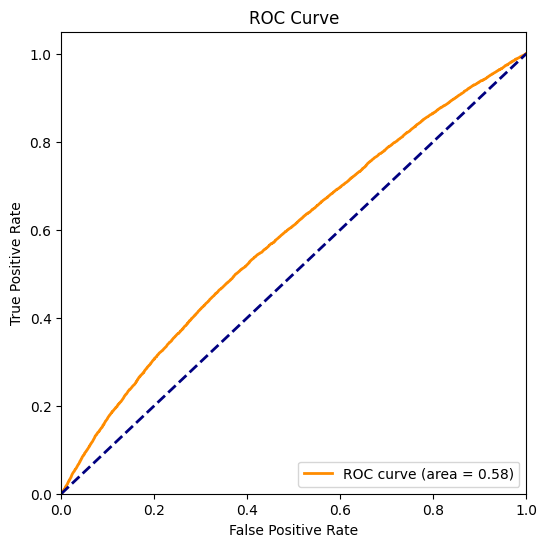

In [150]:
plot_roc_curve(fpr4, tpr4, roc_auc4)

In [155]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=1, n_estimators = 200)
clf_rf.fit(X4_train, y4_train)
y_pred_rf = clf_rf.predict(X4_test)
score_test_rf = accuracy_score(y4_test, y_pred_rf)
print(score_test_rf)

0.6585333333333333


In [156]:
clf_rf.feature_importances_

array([0.49718579, 0.06752026, 0.00537742, 0.01061225, 0.00644351,
       0.00769753, 0.0143489 , 0.39081434])

Feature 0: Age, Score: 49.719%
Feature 1: day_of_week, Score: 6.752%
Feature 2: Alcoolism, Score: 0.538%
Feature 3: HiperTension, Score: 1.061%
Feature 4: Smokes, Score: 0.644%
Feature 5: Scholarship, Score: 0.770%
Feature 6: Sms_Reminder, Score: 1.435%
Feature 7: AwaitingTime, Score: 39.081%


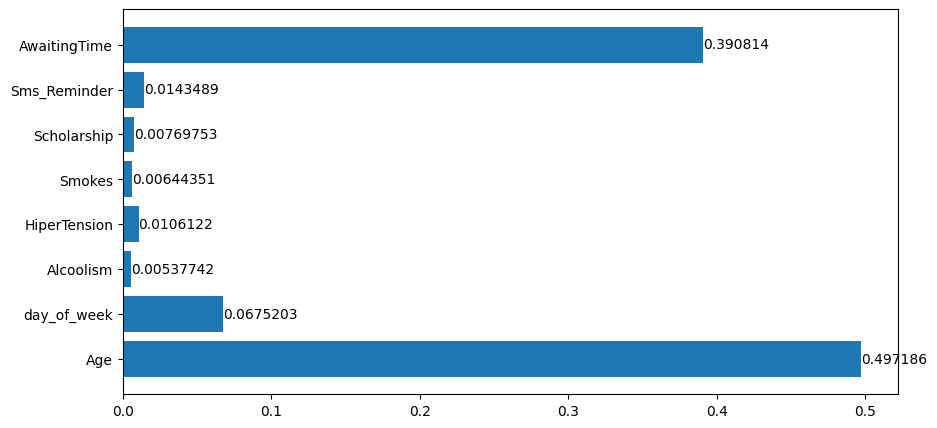

In [158]:
colname = []
importance_list = []

# summarize feature importance
for i, v in enumerate(zip(list(['Age', 'day_of_week', 'Alcoolism', 'HiperTension', 'Smokes', 'Scholarship', 'Sms_Reminder', 'AwaitingTime']),
                          clf_rf.feature_importances_)):
    if v[1] > 0:
        print('Feature {}: {}, Score: {:.3%}'.format(i, v[0], v[1]))
        colname.append(v[0])
        importance_list.append(v[1])

# plot feature importance
fig, ax = plt.subplots(figsize=(10, 5))
fig.set_dpi(100)
bars = ax.barh(colname, importance_list)
ax.bar_label(bars)
plt.show()